In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import analysis_pca

Ts = 1000
data_path = r'C:\Users\IBS\Desktop\python_code_N2'
save_path = r'C:\Users\IBS\Desktop\figures'

In [5]:
# Path to your Excel file
SOURCE_DATA_SF3 = 'SupplementaryFigure3.xlsx'

# Read specific sheet and ranges
mf = pd.read_excel(SOURCE_DATA_SF3, sheet_name='Figure S3b,c,d,f', usecols='A:HY', skiprows=2, nrows=502)
pc = pd.read_excel(SOURCE_DATA_SF3, sheet_name='Figure S3b,c,d,f', usecols='HZ:TP', skiprows=2, nrows=502)

In [6]:
# rate is ssc0, drate is wv0
lm_MF = {
    'rate': mf.iloc[:, 0:116].to_numpy().T,
    'drate': mf.iloc[:, 116:232].to_numpy().T,
    'v0': mf.iloc[0, 232],
    'label': 'MF'
}

lm_PC = {
    'rate': pc.iloc[:, 0:151].to_numpy().T,
    'drate': pc.iloc[:, 151:302].to_numpy().T,
    'v0': pc.iloc[0, 302],
    'label': 'PC'
}

In [7]:
# PCA analysis for mossy fibers

apca = analysis_pca.analysis_pca(Ts, lm_MF["rate"], save_path)
PCA_total_MP = apca.pca_analy(lm_MF["rate"])

# plt.plot(PCA_total_MP['p'].T[0],PCA_total_MP['p'].T[1])

# PCA analysis for perkinje cells

apca = analysis_pca.analysis_pca(Ts, lm_PC["rate"], save_path)
PCA_total_PC = apca.pca_analy(lm_PC["rate"])

# plt.plot(PCA_total_PC['p'].T[0],PCA_total_PC['p'].T[1])

#For FN PCA

import pre_processing

ppss = pre_processing.pre_processing(Ts, data_path, save_path)
[final_cat, data_cat, val_cat, dur_cat, rejectedXY_cat] = ppss.datasorting_orientation(1)

apca = analysis_pca.analysis_pca(Ts, data_cat, save_path)
data_cat_sm = apca.smoothing_data()
PCA_total = apca.pca_analy(data_cat_sm)

Dimensions: 1, Variance explained: 75.03%
Dimensions: 2, Variance explained: 87.63%
Dimensions: 3, Variance explained: 93.15%
Dimensions: 4, Variance explained: 95.70%
Dimensions: 5, Variance explained: 97.19%
Dimensions to be reduced: 2
Dimensions: 1, Variance explained: 51.04%
Dimensions: 2, Variance explained: 76.08%
Dimensions: 3, Variance explained: 85.97%
Dimensions: 4, Variance explained: 92.26%
Dimensions: 5, Variance explained: 94.65%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 57.01%
Dimensions: 2, Variance explained: 76.14%
Dimensions: 3, Variance explained: 82.16%
Dimensions: 4, Variance explained: 86.65%
Dimensions: 5, Variance explained: 89.17%
Dimensions to be reduced: 5
Dimensions: 1, Variance explained: 64.05%
Dimensions: 2, Variance explained: 78.73%
Dimensions: 3, Variance explained: 83.99%
Dimensions: 4, Variance explained: 87.57%
Dimensions: 5, Variance explained: 90.69%
Dimensions to be reduced: 4
Dimensions: 1, Variance explained: 65.68%
Dimens

In [8]:
PCA_total_MP

{'v': array([[ 0.08878389,  0.14763346,  0.06909889, ...,  0.04286726,
          0.20767307, -0.01114986],
        [ 0.12064318,  0.07082745,  0.03528532, ..., -0.02590837,
          0.08932283,  0.03807284],
        [-0.00398599, -0.0773392 , -0.06641618, ..., -0.06789225,
         -0.0103536 , -0.11026015],
        ...,
        [ 0.00510002, -0.00476935, -0.03434028, ...,  0.01032665,
          0.00311121, -0.01375308],
        [-0.00615147, -0.00250498,  0.01608546, ..., -0.00192664,
         -0.01108177,  0.00166994],
        [ 0.00228899,  0.00165593,  0.02620349, ...,  0.01142151,
          0.00709046,  0.00837205]], shape=(116, 116)),
 'p': array([[-2.47565215e-01, -1.96340229e-02, -4.48512167e-02, ...,
         -9.29072743e-05, -2.11763304e-05, -4.61134107e-05],
        [-2.46824824e-01, -1.98572585e-02, -4.34597036e-02, ...,
         -2.38661290e-05,  6.70826618e-06, -4.35215006e-05],
        [-2.45797342e-01, -1.97090936e-02, -4.34965435e-02, ...,
          2.72631254e-05,  6

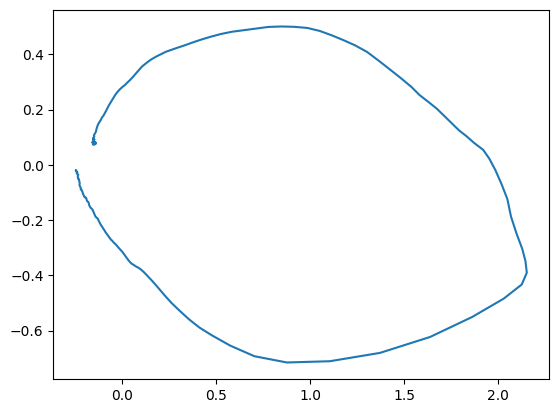

In [9]:
plt.plot(PCA_total_MP['p'][:,0],PCA_total_MP['p'][:,1])

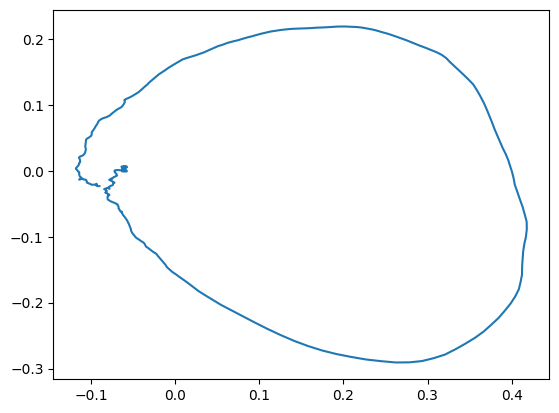

In [10]:
plt.plot(PCA_total_PC['p'][:,0],PCA_total_PC['p'][:,1])

In [11]:
pca_data = []
for pc in range(4):
    for a in range(8):
        temp = PCA_total[a]['p'].T
        temp = temp[pc]
        pca_data.append(temp)
pca_data = np.array(pca_data)

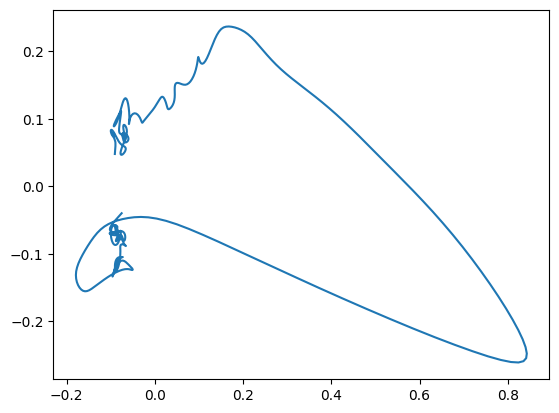

In [12]:
plt.plot(pca_data[2],pca_data[8])

In [13]:
pFN = pca_data[:,50:550]

pMP = PCA_total_MP['p']
pMP = pMP[:500, :5]

pPC = PCA_total_PC['p']
pPC = pPC[:500, :5]

pMPC = np.hstack((pMP, pPC))

In [14]:
pFN = pca_data[:,50:550]

pMP = PCA_total_MP['p']
pMP = pMP[:500, :2]

pPC = PCA_total_PC['p']
pPC = pPC[:500, :4]

pMPC = np.hstack((pMP, pPC))

In [15]:
pFN.shape

(32, 500)

In [16]:
betas = []
r_2 = []
for a in range(len(pFN)):
    beta, resid = np.linalg.lstsq(pMPC, pFN[a], rcond=None)[:2]
    resid = np.linalg.norm(pMPC @ beta - pFN[a])**2
    r_s = 1 - resid / (pFN[a].size * pFN[a].var())
    betas.append(beta)
    r_2.append(r_s)

betas = np.array(betas)
r_2 = np.array(r_2)

Text(0.5, 1.0, 'a=24, R^2=0.8478294342509325')

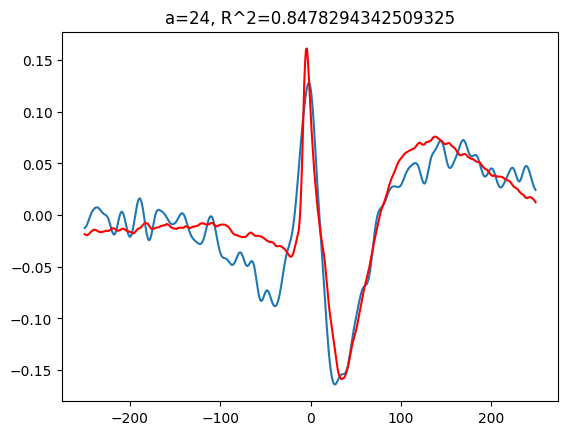

In [17]:
a=24
t = np.arange(-250,250)
plt.plot(t, pFN[a], t, pMPC @ betas[a], 'r')
resid = np.linalg.norm(pMPC @ betas[a] - pFN[a])**2
r_s = 1 - resid / (pFN[a].size * pFN[a].var())
plt.title(f'a={a}, R^2={r_s}')

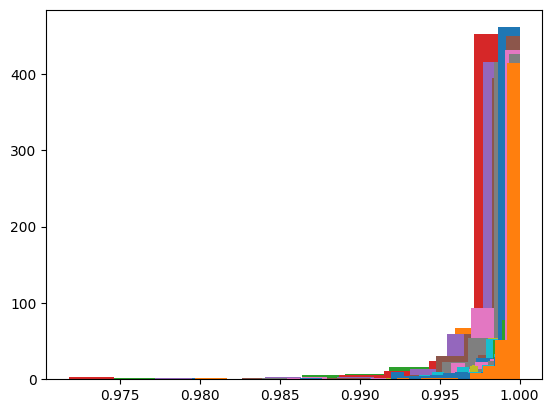

In [18]:
# hist for r^2 (timepoint is sample)

for a in range(len(pFN)):
    plt.hist(1-(pMPC @ betas[a] - pFN[a])**2)
    

In [19]:
df(betas[:16])

,0,1,2,3,4,5
0,0.352483,-0.350611,0.438208,0.608242,0.690383,-0.501252
1,0.398816,-0.487578,0.512260,0.720660,0.424688,-0.572048
2,0.446815,-0.475276,0.371034,1.029513,0.154328,-0.858864
3,0.449729,-0.226730,0.317058,1.033881,0.012616,-0.827470
4,0.444467,-0.261105,0.361076,1.186867,-0.045838,-1.162982
5,0.397199,0.020467,0.381682,1.143729,-0.272916,-0.920517
6,0.478485,-0.139017,0.174377,1.352613,-0.441856,-0.889017
7,0.383778,-0.340101,0.422804,0.881047,0.315349,-0.736331
8,-0.270370,0.162728,0.726413,0.020640,1.272325,0.146949
9,-0.151929,0.136976,0.545833,0.257726,0.860796,-0.100049


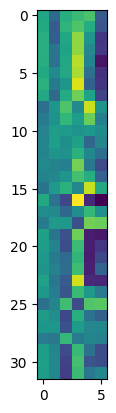

In [35]:
plt.imshow(betas)
# plt.savefig("beta.jpg")

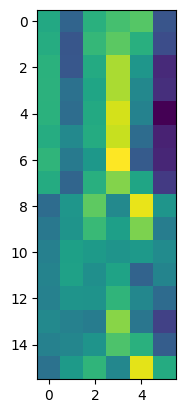

In [36]:
plt.imshow(betas[:16])

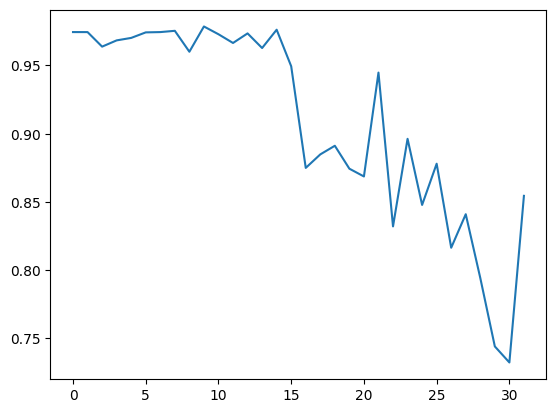

In [37]:
plt.plot(r_2)

# plt.savefig("r2.jpg")

In [38]:
pFN.shape

(32, 500)

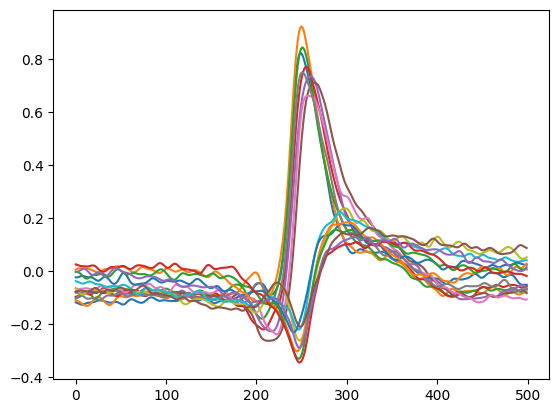

In [39]:
for a in range(16):
    plt.plot(pFN[a])